In [1]:
import os
import sys
# Get the path to the current directory of the script
bins_path = "/Users/jzeng63/Desktop/CDNA/ML/HMM/TS/Bins"
sys.path.append(bins_path)

In [2]:
import pandas as pd
import numpy as np
from itertools import product
import random
import utility as utl
import matplotlib.pyplot as plt
import joblib
from pykalman import KalmanFilter
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score

In [3]:
# get data ['aval_AlloMap', 'aval_AlloSure', "ady_dna"]
X_train, X_test, y_train, y_test = utl._prepare_training(data_path = '../../../Data_processing/Outputs/train_2024_15days_positive.csv', features = ['aval_AlloMap', 'aval_AlloSure', "aval_lvef", "ady_dna"], exclusion = True, split = 0.8, patient_level = False)

In [4]:
# # Initialize the scaler
# scaler = StandardScaler()

# # Fit the scaler on the training data (only X_train)
# X_train = scaler.fit_transform(X_train)

# # Use the same scaler to transform the test data (use the same mean and std from X_train)
# X_test = scaler.transform(X_test)

In [20]:
# first_order 
results = utl._find_init_parameters(X_train, X_test)

# second_order
# results = utl._find_init_parameters_velocity(X_train, X_test, dt=1)

Residual Mean = -1.0674, Residual Std Dev = 87.2531, Covariance Diff = 0.0000, Combined Metric = 0.2543
Residual Mean = -0.0969, Residual Std Dev = 85.4634, Covariance Diff = 9425.9438, Combined Metric = 0.2679
Residual Mean = -3.9938, Residual Std Dev = 114.2521, Covariance Diff = 118352.3893, Combined Metric = 0.7833
Residual Mean = -1.3589, Residual Std Dev = 112.4588, Covariance Diff = 15370.5529, Combined Metric = 0.4804
Residual Mean = -0.3117, Residual Std Dev = 54.2251, Covariance Diff = 113012.1687, Combined Metric = 0.3328
Residual Mean = -0.0462, Residual Std Dev = 53.8202, Covariance Diff = 1243.3759, Combined Metric = 0.0153
Residual Mean = -1.0626, Residual Std Dev = 78.5450, Covariance Diff = 6322.9326, Combined Metric = 0.2089
Residual Mean = -0.2511, Residual Std Dev = 75.7575, Covariance Diff = 1059.4790, Combined Metric = 0.1739
Residual Mean = -13.3174, Residual Std Dev = 91.6168, Covariance Diff = 48972.0069, Combined Metric = 0.4238
Residual Mean = -11.9424, Resid

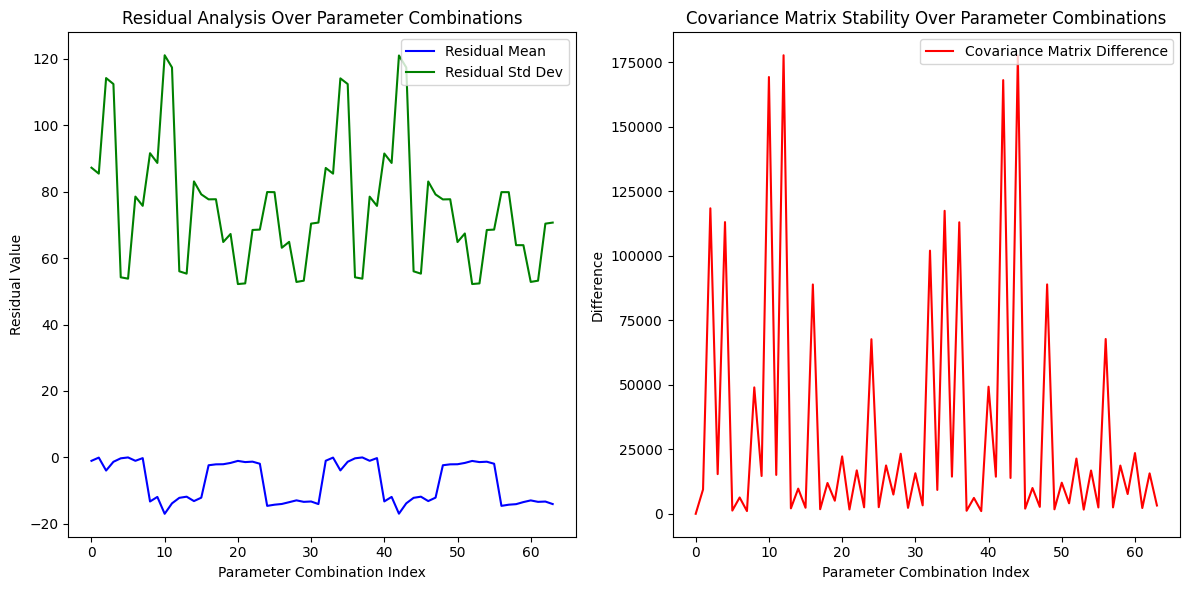

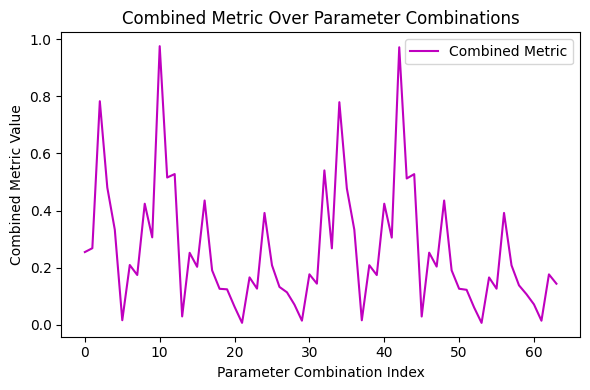

Best parameters saved to ../Outputs/80%train_50iter_commetrics_2024_15days_positive_No__partial__AS&AM&lvef_/best_parameters.json
All results saved to ../Outputs/80%train_50iter_commetrics_2024_15days_positive_No__partial__AS&AM&lvef_/all_results.csv
Plots saved to ../Outputs/80%train_50iter_commetrics_2024_15days_positive_No__partial__AS&AM&lvef_/residual_covariance_plots.png and ../Outputs/80%train_50iter_commetrics_2024_15days_positive_No__partial__AS&AM&lvef_/combined_metric_plot.png


In [21]:
import json 
# Create an output directory if it doesn't exist
train_split = "80%train_50iter_commetrics_2024_15days_positive"
output_dir = "../Outputs"
per_patient = "_No_" # _Yes_ vs _No_
full_data = "_partial_" # _full_ vs _partial
features = "_AS&AM&lvef_" # _AS_, _AM_ vs _AS&AM_ vs AM-noptd
utl._save_parameters(train_split, output_dir, per_patient, full_data, features, results)

# Fine-tuning

In [5]:
import json 
train_split = "80%train_50iter_commetrics_2024_15days"
output_dir = "../Outputs"
per_patient = "_No_" # _Yes_ vs _No_
full_data = "_partial_" # _full_ vs _partial
features = "_AS&AM&lvef_" # _AS_, _AM_ vs _AS&AM_ vs AM-noptd vs _AS&AM&lvef_

experiments_log = train_split + per_patient + full_data + features
path = os.path.join(output_dir, experiments_log)
best_params_file = os.path.join(path, "best_parameters.json")
# Function to read JSON file
def read_json_file(file_path):
    try:
        with open(file_path, 'r') as file:
            data = json.load(file)
        return data
    except FileNotFoundError:
        print(f"Error: The file at {file_path} was not found.")
    except json.JSONDecodeError:
        print("Error: The file could not be decoded. Ensure it's a valid JSON file.")

best_params = read_json_file(best_params_file)

Iteration 1: Residual Mean = 1.5847, Residual Std Dev = 51.1680
Iteration 2: Residual Mean = 1.1597, Residual Std Dev = 54.9744
Iteration 2: Covariance Matrix Difference = 171549.5275
Iteration 3: Residual Mean = 0.9921, Residual Std Dev = 57.2469
Iteration 3: Covariance Matrix Difference = 82215.7903
Iteration 4: Residual Mean = 0.9124, Residual Std Dev = 58.6528
Iteration 4: Covariance Matrix Difference = 36956.1746
Iteration 5: Residual Mean = 0.8646, Residual Std Dev = 59.6180
Iteration 5: Covariance Matrix Difference = 15540.6026
Iteration 6: Residual Mean = 0.8299, Residual Std Dev = 60.3641
Iteration 6: Covariance Matrix Difference = 5790.3353
Iteration 7: Residual Mean = 0.8018, Residual Std Dev = 60.9981
Iteration 7: Covariance Matrix Difference = 1444.1427
Iteration 8: Residual Mean = 0.7775, Residual Std Dev = 61.5699
Iteration 8: Covariance Matrix Difference = 502.4953
Iteration 9: Residual Mean = 0.7561, Residual Std Dev = 62.1026
Iteration 9: Covariance Matrix Difference 

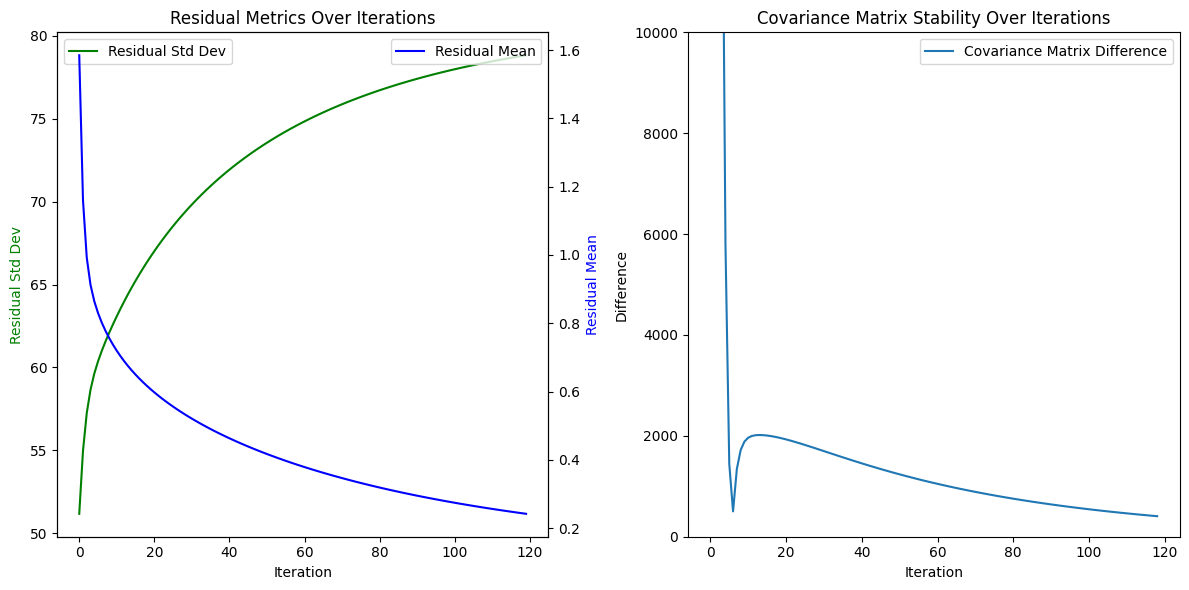

In [6]:
#['aval_AlloMap', 'aval_AlloSure', "aval_lvef", "ady_dna"]
full_data = "_full_" # _full_ vs _partial
X_train, X_test, y_train, y_test = utl._prepare_training(data_path = '../../../Data_processing/Outputs/train_2024_15days.csv', features = ['aval_AlloMap', 'aval_AlloSure', "aval_lvef", "ady_dna"], exclusion = False, split = 0.8, patient_level = False)

kf = utl.fine_tuning(X_train, X_test, path, best_params, velocity = 1, iteration = 120)

In [7]:
import joblib
iteration = str(120)

experiments_log = train_split + per_patient + full_data + features
path = os.path.join(output_dir, experiments_log)

model_name = path.split("/")[-1] + iteration + ".pkl"

model_directory = "../models"
model_path = os.path.join(model_directory, model_name)
# Save the model to a file
joblib.dump(kf, model_path)

['../models/80%train_50iter_commetrics_2024_15days_No__full__AS&AM&lvef_120.pkl']

# Load Models

# Inference

In [10]:
X_train, X_test, y_train, y_test = utl._prepare_training(data_path = '../../../Data_processing/Outputs/train_2024_15days.csv', features = ['aval_AlloMap', 'aval_AlloSure', 'aval_lvef', "ady_dna"], exclusion = False, split = 0.8, patient_level = False)

# # Initialize the scaler
# scaler = StandardScaler()

# # Fit the scaler on the training data (only X_train)
# X_train = scaler.fit_transform(X_train)

# # Use the same scaler to transform the test data (use the same mean and std from X_train)
# X_test = scaler.transform(X_test)
df = pd.DataFrame()
for threshold in [30, 31, 32, 33, 34, 35]:
    new_row = utl._inference_with_future_steps(kf, X_test, X_train, y_test, y_train, features="AM", threshold = threshold, n_future_steps=1, df=None, single = False)
    df = pd.concat([df, new_row], axis=1)
df.to_csv("allomap_screening.csv")

dm = pd.DataFrame()
for threshold in [0.1, 0.2, 0.3, 0.4, 0.5]:
    new_row = utl._inference_with_future_steps(kf, X_test, X_train, y_test, y_train, features="AS", threshold = threshold, n_future_steps=1, df=None, single = False)
    dm = pd.concat([dm, new_row], axis=1)
dm.to_csv("as_screening.csv")

In [89]:

# Perform filtering to get the state means and covariances
state_means, state_covariances = kf.filter(X_test)
df = pd.DataFrame()
for as_threshold in [0.2, 0.3, 0.4, 0.5]:
    for am_threshold in [30, 31, 32, 33, 34, 35]:
        AM = state_means[:, 0]
        AS = state_means[:, 1]
        prediction = state_means[:, 1]
        predicted_labels = ((AS >= as_threshold) & (AM >= am_threshold)).astype(int)
        true_predictor_AS = X_test[:, 1]
        true_predictor_AM = X_test[:, 0]

        # Calculate current state metrics
        model_auc = roc_auc_score(y_test, prediction)
        base_auc = roc_auc_score(y_test, true_predictor_AS)
        model_acc = accuracy_score(y_test, predicted_labels)
        baseline_predicted_labels = ((true_predictor_AS >= as_threshold) & (true_predictor_AM >= am_threshold)).astype(int)
        base_acc = accuracy_score(y_test, baseline_predicted_labels)

        tn, fp, fn, tp = confusion_matrix(y_test, predicted_labels).ravel()
        ppv = precision_score(y_test, predicted_labels)
        sensitivity = recall_score(y_test, predicted_labels)
        specificity = tn / (tn + fp)

        tn_base, fp_base, fn_base, tp_base = confusion_matrix(y_test, baseline_predicted_labels).ravel()
        base_ppv = precision_score(y_test, baseline_predicted_labels)
        base_sensitivity = recall_score(y_test, baseline_predicted_labels)
        base_specificity = tn_base / (tn_base + fp_base)

        # Create a dictionary with the new results for both current and future states
        results = {
            f'Threshold_{str(as_threshold)+"_"+str(am_threshold)}': [
                model_auc, model_acc, ppv, sensitivity, specificity,base_auc, base_acc, base_ppv, base_sensitivity, base_specificity
            ]
        }

        # List of metric names
        metric_names = [
            'Model_AUC','Model_Accuracy',
            'Model_PPV', 'Model_Sensitivity', 'Model_Specificity','Baseline_AUC','Baseline_Accuracy',
            'Baseline_PPV', 'Baseline_Sensitivity', 'Baseline_Specificity'
        ]

        # Create a new DataFrame with these results and metric names
        new_row = pd.DataFrame(results, index=metric_names)

        # Concatenate the new row to the existing DataFrame
        df = pd.concat([df, new_row], axis=1)
df.to_csv("combination.csv")

# walkthrough different type of models

In [81]:
model_directory = "../models"
AS_noptd = "80%train_50iter_commetrics_velocity_No__full__AS_60.pkl"
AM_noptd = "80%train_50iter_commetrics_velocity_No__full__AM_60.pkl"
AS_AM_noptd = "80%train_50iter_commetrics_velocity_No__full__AS&AM_120.pkl"

models = {"AS_noptd":[AS_noptd, "AS", 0.5, ['aval_AlloSure', "ady_dna"]], "AM_noptd":[AM_noptd, "AM", 34, ['aval_AlloMap', "ady_dna"]], "AS_AM_noptd(*)":[AS_AM_noptd, "AS", 0.5, ['aval_AlloMap','aval_AlloSure', "ady_dna"]], "AS_AM_noptd":[AS_AM_noptd, "AS&AM", 0.5, ['aval_AlloMap','aval_AlloSure', "ady_dna"]]}

dfs = []
for model in models.keys():
    print (model)
    X_train, X_test, y_train, y_test = utl._prepare_training(data_path = '../../../Data_processing/Outputs/train.csv', features = models[model][3], exclusion = False, split = 0.8, patient_level = False)
    model_path = os.path.join(model_directory, models[model][0])
    kf = joblib.load(model_path)

    if model == "AS_AM_noptd" or model == "AS_AM_noptd(*)":
        single = False
    else:
        single = True
    
    df = utl._inference_with_future_steps(kf, X_test, X_train, y_test, y_train, features = models[model][1], threshold = models[model][2], n_future_steps=1, df=None, single = single)

    dfs.append(df)

AS_noptd
AM_noptd
AS_AM_noptd(*)
AS_AM_noptd


In [82]:
output_file = os.path.join(output_dir, "_including_pst_full_velocity.csv")
pd.concat(dfs, axis = 1).to_csv(output_file)

In [83]:
pd.concat(dfs, axis = 1)

,Threshold_0.5,Threshold_34,Threshold_0.5,Threshold_0.5
Model_AUC,0.728390,0.570554,0.735636,0.735636
Model_Accuracy,0.897826,0.784348,0.887391,0.865652
Model_PPV,0.381643,0.120098,0.340611,0.224215
Model_Sensitivity,0.424731,0.263441,0.419355,0.268817
Model_Specificity,0.939451,0.830180,0.928571,0.918165
Baseline_AUC,0.702114,0.572891,0.702114,0.702114
Baseline_Accuracy,0.898696,0.688261,0.898696,0.898696
Baseline_PPV,0.375661,0.117986,0.375661,0.375661
Baseline_Sensitivity,0.381720,0.440860,0.381720,0.381720
Baseline_Specificity,0.944182,0.710028,0.944182,0.944182


# Rebuild secondary layer

In [33]:
AS_AM_noptd = "80%train_50iter_commetrics__No__full__AS&AM&lvef_120.pkl"
model_path = os.path.join(model_directory,AS_AM_noptd)
kf = joblib.load(model_path)

In [124]:
X_train, X_test, y_train, y_test = utl._prepare_training(data_path = '../../../Data_processing/Outputs/train_2024_15days.csv', features = ['aval_AlloMap','aval_AlloSure', "aval_lvef", "ady_dna"], exclusion = False, split = 0.8, patient_level = False)
train_state, train_covariance = kf.filter(X_train)
test_state, test_covariance = kf.filter(X_test)

In [134]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
# Step 4: Logistic Regression model
# Define logistic regression with hyperparameter tuning (regularization)
logreg = LogisticRegression()

# # Initialize the scaler
# scaler = StandardScaler()

# # Fit the scaler on the training data (only X_train)
# train_state = scaler.fit_transform(train_state)

# # Use the same scaler to transform the test data (use the same mean and std from X_train)
# test_state = scaler.transform(test_state)

# Step 5: Set up hyperparameters to optimize (using grid search)
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['lbfgs', 'liblinear'], "class_weight":['balanced']}
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='roc_auc')

# Step 6: Fit the model on training data and find the best parameters
grid_search.fit(train_state[:, 0:2], y_train)
best_model = grid_search.best_estimator_

# Step 7: Predict on test set
y_pred = best_model.predict(test_state[:, 0:2])
y_pred_proba = best_model.predict_proba(test_state[:, 0:2])[:, 1]

# Step 8: Confusion Matrix to calculate specificity and sensitivity
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# Step 9: Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
ppv = precision_score(y_test, y_pred)  # Positive Predictive Value
sensitivity = recall_score(y_test, y_pred)  # Sensitivity (Recall)
specificity = tn / (tn + fp)  # Specificity (True Negative Rate)
auc = roc_auc_score(y_test, y_pred_proba)  # Area Under ROC Curve

# Step 10: Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"PPV (Precision): {ppv:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"AUC: {auc:.4f}")

Accuracy: 0.8557
PPV (Precision): 0.3154
Sensitivity (Recall): 0.5466
Specificity: 0.8855
AUC: 0.7607


In [138]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
# Step 4: Logistic Regression model
# Define logistic regression with hyperparameter tuning (regularization)
logreg = LogisticRegression()

# # Initialize the scaler
# scaler = StandardScaler()

# # Fit the scaler on the training data (only X_train)
# train_state = scaler.fit_transform(train_state)

# # Use the same scaler to transform the test data (use the same mean and std from X_train)
# test_state = scaler.transform(test_state)

# Step 5: Set up hyperparameters to optimize (using grid search)
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['lbfgs', 'liblinear'], "class_weight":['balanced']}
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='roc_auc')

# Step 6: Fit the model on training data and find the best parameters
grid_search.fit(X_train[:, 1].reshape(-1, 1), y_train)
best_model = grid_search.best_estimator_

# Step 7: Predict on test set
y_pred = best_model.predict(X_test[:, 1].reshape(-1, 1))
y_pred_proba = best_model.predict_proba(X_test[:, 1].reshape(-1, 1))[:, 1]

# Step 8: Confusion Matrix to calculate specificity and sensitivity
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# Step 9: Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
ppv = precision_score(y_test, y_pred)  # Positive Predictive Value
sensitivity = recall_score(y_test, y_pred)  # Sensitivity (Recall)
specificity = tn / (tn + fp)  # Specificity (True Negative Rate)
auc = roc_auc_score(y_test, y_pred_proba)  # Area Under ROC Curve

# Step 10: Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"PPV (Precision): {ppv:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"AUC: {auc:.4f}")

Accuracy: 0.8863
PPV (Precision): 0.3807
Sensitivity (Recall): 0.4658
Specificity: 0.9269
AUC: 0.7647


# test_data_set 2024

In [4]:
AS_AM_noptd = "80%train_50iter_commetrics__No__full__AS&AM&lvef_120.pkl"
model_directory = "../models"
model_path = os.path.join(model_directory,AS_AM_noptd)
kf = joblib.load(model_path)

In [5]:
t2023 = pd.read_csv('../../../Data_processing/Outputs/train.csv')
t2024 = pd.read_csv('../../../Data_processing/Outputs/train_2024.csv')

In [6]:
# Rows in df2 but not in df1
test = t2024[~t2024["usubjid"].isin(t2023["usubjid"])].dropna()
X = test[['aval_AlloMap','aval_AlloSure', "aval_lvef", "ady_dna"]].values
y = test["label"].values

In [7]:
print (test["usubjid"].nunique())

263


In [8]:
print (test.value_counts("label"))

label
0.0    1433
1.0     103
Name: count, dtype: int64


In [9]:
test.head(5)

,usubjid,ady_dna,avisitn,aval_AlloMap,aval_AlloSure,aval_lvef,ady_lvef_diff,label
400,CDNA-SN-C-00011-S01-022,1077,1095,36.0,0.071765,60.0,1.0,0.0
768,CDNA-SN-C-00011-S01-046,66,60,36.0,0.092189,50.0,39.0,0.0
769,CDNA-SN-C-00011-S01-046,81,91,35.0,0.088244,50.0,54.0,0.0
777,CDNA-SN-C-00011-S01-046,642,638,33.0,0.094217,62.0,0.0,0.0
1179,CDNA-SN-C-00011-S01-069,78,91,28.0,0.049498,45.0,15.0,0.0


Statistical Summary of ady_dna:
           ady_dna      avisitn  aval_AlloSure    aval_lvef  aval_AlloMap
count  1536.000000  1536.000000    1536.000000  1536.000000   1536.000000
mean    307.202474   309.222656       0.261688    59.827474     29.753906
std     269.223661   268.414318       0.698658     7.015108      6.629073
min      56.000000    60.000000      -0.067295    20.000000      3.000000
25%     120.750000   121.000000       0.028768    57.500000     27.000000
50%     219.500000   182.000000       0.064322    60.000000     31.000000
75%     369.250000   365.000000       0.182763    65.000000     35.000000
max    1804.000000  1825.000000       9.053838    70.000000     39.000000


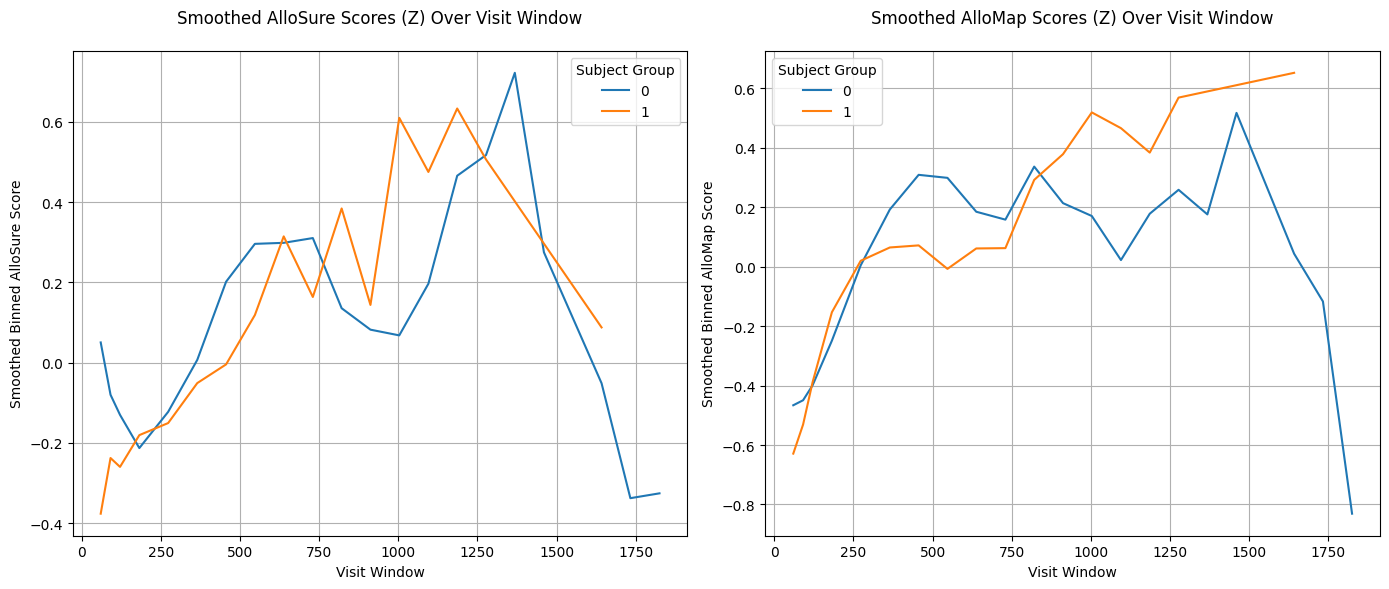

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = test.copy()

# Step 1: Statistical Summary of ady_dna
ady_dna_summary = data[['usubjid', 'ady_dna', "avisitn", "aval_AlloSure", "aval_lvef", "aval_AlloMap"]].describe()
print("Statistical Summary of ady_dna:")
print(ady_dna_summary)

ady_dna_summary.to_csv("../Outputs/stats_summary_lvef.csv")

# Label subjects based on whether they ever had a rejection
corrected_label = data.groupby('usubjid')['label'].apply(lambda x: 1 if x.max() == 1 else 0)
data = data.merge(corrected_label.rename('label_usubjid'), on = "usubjid", how = "left")

# a function for Min-Max normalization or z-transformation etc
def min_max_normalize(series):
    return (series - series.min()) / (series.max() - series.min())

def z_transformation(series):
    return (series - series.mean()) / series.std()

# Apply Min-Max normalization to AlloSure, AlloMap, and globally normalize ady_dna
data['norm_AlloSure'] = data.groupby('usubjid')['aval_AlloSure'].transform(z_transformation)
data['norm_AlloMap'] = data.groupby('usubjid')['aval_AlloMap'].transform(z_transformation)
# optional
data['global_norm_ady_dna'] = z_transformation(data['ady_dna'])

# Step 3: Bin the globally normalized 'ady_dna' into intervals or bin according to the visits
bins = 100  # Change this value as needed (e.g., bins = 10)
data['binned_global_norm_ady_dna'] = pd.cut(data['global_norm_ady_dna'], bins=bins, labels=False)


# Calculate the mean for each bin using the globally normalized 'ady_dna' or preselected avisitn
binned_data_global = data.groupby(['avisitn', 'label_usubjid']).agg({
'norm_AlloSure': 'mean',
'norm_AlloMap': 'mean'
}).reset_index()

# Step 4: Define a function for rolling average smoothing
def smooth_series(series, window=3):
    return series.rolling(window=window, min_periods=1).mean()

# Apply smoothing to the binned data with global normalization
binned_data_global['smooth_binned_AlloSure'] = binned_data_global.groupby('label_usubjid')['norm_AlloSure'].transform(smooth_series)
binned_data_global['smooth_binned_AlloMap'] = binned_data_global.groupby('label_usubjid')['norm_AlloMap'].transform(smooth_series)

binned_data_global = binned_data_global.loc[binned_data_global["avisitn"] != 9999]

# Step 5: Plotting the smoothed binned normalized AlloSure and AlloMap scores over globally normalized time
plt.figure(figsize=(14, 6))

# Smoothed plot for globally binned normalized AlloSure over time for the two groups
plt.subplot(1, 2, 1)
sns.lineplot(x='avisitn', y='smooth_binned_AlloSure', hue='label_usubjid', data=binned_data_global)
plt.title('Smoothed AlloSure Scores (Z) Over Visit Window', pad=20)
plt.xlabel('Visit Window')
plt.ylabel('Smoothed Binned AlloSure Score')
plt.legend(title='Subject Group')
plt.grid(True)

# Smoothed plot for globally binned normalized AlloMap over time for the two groups
plt.subplot(1, 2, 2)
sns.lineplot(x='avisitn', y='smooth_binned_AlloMap', hue='label_usubjid', data=binned_data_global)
plt.title('Smoothed AlloMap Scores (Z) Over Visit Window', pad=20)
plt.xlabel('Visit Window')
plt.ylabel('Smoothed Binned AlloMap Score')
plt.legend(title='Subject Group')
plt.grid(True)

plt.tight_layout()
plt.show()

<Axes: >

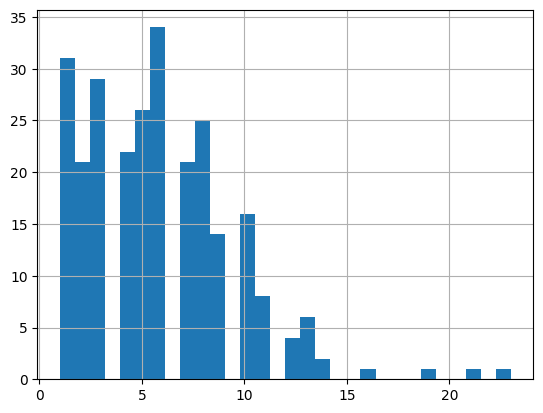

In [57]:
test['usubjid'].value_counts().hist(bins=30)

In [45]:
utl._inference_with_future_steps(kf, X, X, y, y, features="AS", threshold=0.1, n_future_steps=1, df=None, single = False)

,Threshold_0.1
Model_AUC,0.750100
Model_Accuracy,0.504557
Model_PPV,0.103614
Model_Sensitivity,0.834951
Model_Specificity,0.480809
Baseline_AUC,0.749809
Baseline_Accuracy,0.660156
Baseline_PPV,0.133100
Baseline_Sensitivity,0.737864
Baseline_Specificity,0.654571


In [46]:
dfs = []
for cut in [0.1, 0.2, 0.3, 0.4, 0.5]:    
    df = utl._inference_with_future_steps(kf, X, X, y, y, features="AS", threshold=cut, n_future_steps=1, df=None, single = False)

    dfs.append(df)

In [47]:
output_dir = "../Outputs"
output_file = os.path.join(output_dir, "test_on_dateset_2024_including_lvef.csv")
pd.concat(dfs, axis = 1).to_csv(output_file)

In [48]:
pd.concat(dfs, axis = 1)

,Threshold_0.1,Threshold_0.2,Threshold_0.3,Threshold_0.4,Threshold_0.5
Model_AUC,0.750100,0.750100,0.750100,0.750100,0.750100
Model_Accuracy,0.504557,0.703125,0.791016,0.839844,0.863932
Model_PPV,0.103614,0.140530,0.181287,0.217391,0.235000
Model_Sensitivity,0.834951,0.669903,0.601942,0.533981,0.456311
Model_Specificity,0.480809,0.705513,0.804606,0.861828,0.893231
Baseline_AUC,0.749809,0.749809,0.749809,0.749809,0.749809
Baseline_Accuracy,0.660156,0.777344,0.830078,0.854167,0.867188
Baseline_PPV,0.133100,0.167131,0.203008,0.221198,0.224044
Baseline_Sensitivity,0.737864,0.582524,0.524272,0.466019,0.398058
Baseline_Specificity,0.654571,0.791347,0.852059,0.882066,0.900907


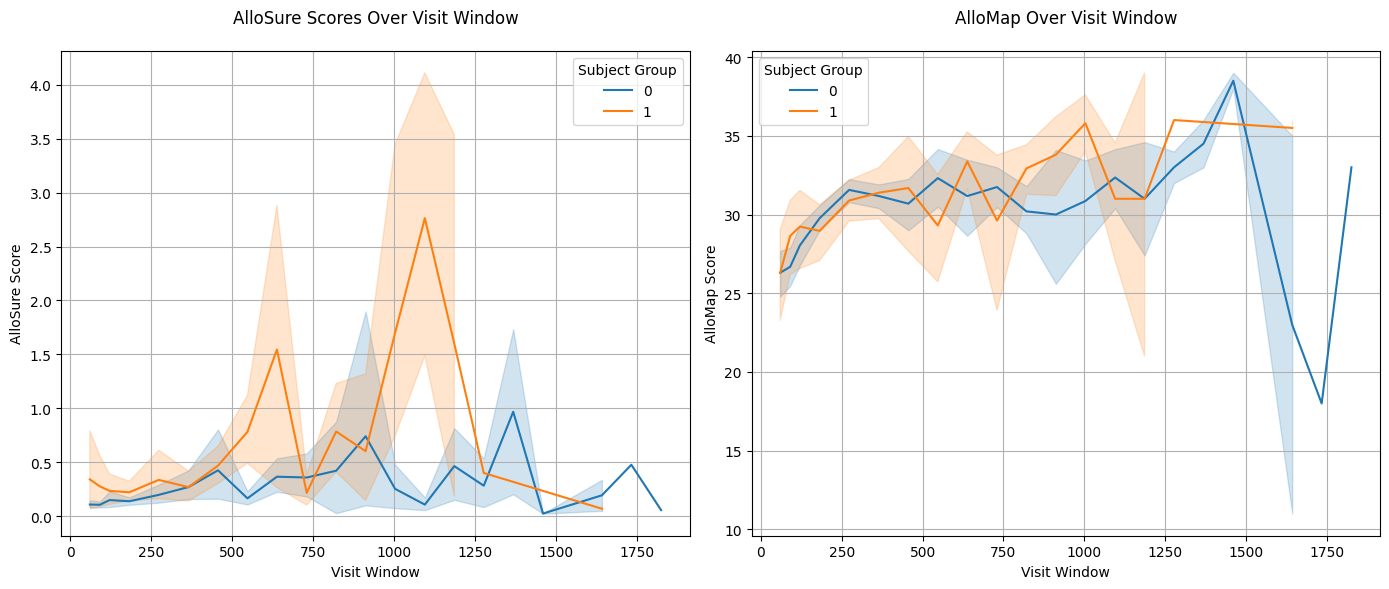

In [14]:
plt.figure(figsize=(14, 6))

# Smoothed plot for globally binned normalized AlloSure over time for the two groups
plt.subplot(1, 2, 1)
sns.lineplot(x='avisitn', y='aval_AlloSure', hue='label_usubjid', data=data)
plt.title('AlloSure Scores Over Visit Window', pad=20)
plt.xlabel('Visit Window')
plt.ylabel('AlloSure Score')
plt.legend(title='Subject Group')
plt.grid(True)

# Smoothed plot for globally binned normalized AlloMap over time for the two groups
plt.subplot(1, 2, 2)
sns.lineplot(x='avisitn', y='aval_AlloMap', hue='label_usubjid', data=data)
plt.title('AlloMap Over Visit Window', pad=20)
plt.xlabel('Visit Window')
plt.ylabel('AlloMap Score')
plt.legend(title='Subject Group')
plt.grid(True)

plt.tight_layout()
plt.show()